In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import data_refinement as dr  
import refined_graphs as rg

df = dr.refine_dataset(dr.read_data('census2011.csv'))
vf = pd.read_csv('census_variables.csv')

In [3]:
total_records = len(df)
print("Total number of records:", total_records)

Total number of records: 569741


In [4]:
print (df.dtypes)

Person ID                       int64
Region                       category
Residence Type               category
Family Composition           category
Population Base              category
Sex                          category
Age                             int64
Marital Status               category
Student                      category
Country of Birth             category
Health                       category
Ethnic Group                 category
Religion                     category
Economic Activity            category
Occupation                   category
Industry                     category
Hours worked per week           int64
Approximated Social Grade    category
dtype: object


In [5]:
for i in df.columns:
    if (i != "Person ID"):
        print (df[i].value_counts())

Region
E12000008    88084
E12000007    83582
E12000002    71436
E12000006    59411
E12000005    56875
E12000009    53774
E12000003    53471
E12000004    45782
W92000004    30977
E12000001    26349
Name: count, dtype: int64
Residence Type
H    559087
C     10654
Name: count, dtype: int64
Family Composition
 2    300962
 1     96690
 3     72641
 5     64519
-9     18851
 4      9848
 6      6230
Name: count, dtype: int64
Population Base
1    561040
2      6730
3      1971
Name: count, dtype: int64
Sex
2    289172
1    280569
Name: count, dtype: int64
Age
1    106832
4     78641
5     77388
3     75948
2     72785
6     65666
7     48777
8     43704
Name: count, dtype: int64
Marital Status
1    270999
2    214180
4     40713
5     31898
3     11951
Name: count, dtype: int64
Student
2    443204
1    126537
Name: count, dtype: int64
Country of Birth
 1    485645
 2     77292
-9      6804
Name: count, dtype: int64
Health
 1    264971
 2    191744
 3     74480
 4     24558
 5      7184
-9   

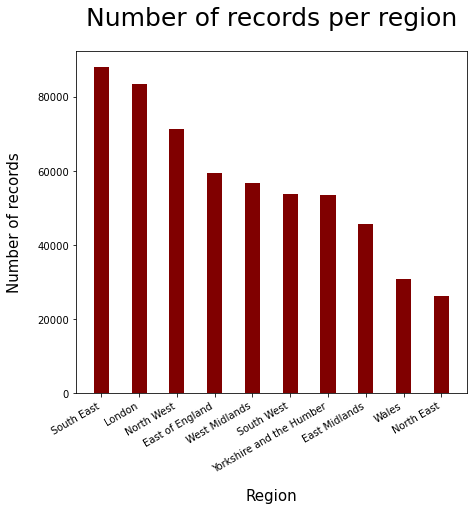

In [6]:
rg.get_bar_chart(df.Region, vf.Region, "Region", "Number of records", "Number of records per region", "region_bar_chart.png")

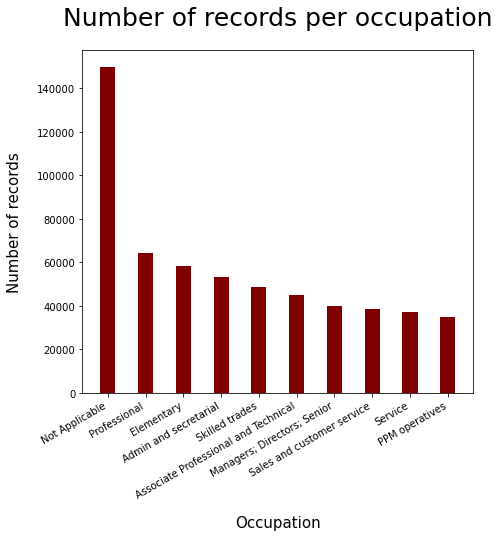

In [7]:
rg.get_bar_chart(df.Occupation, vf.Occupation, "Occupation", "Number of records", "Number of records per occupation", "occupation_bar_chart.png")

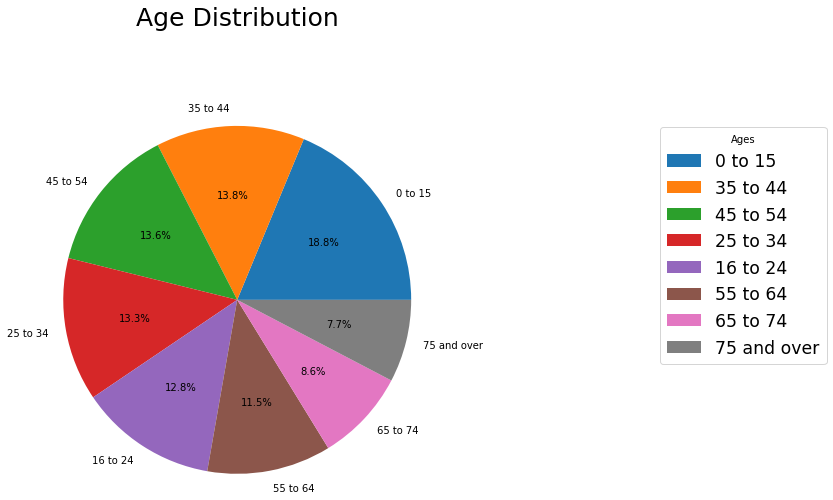

In [8]:
rg.get_pie_chart(df.Age, vf.Age, "Age Distribution", "Ages", "age_pie.png")

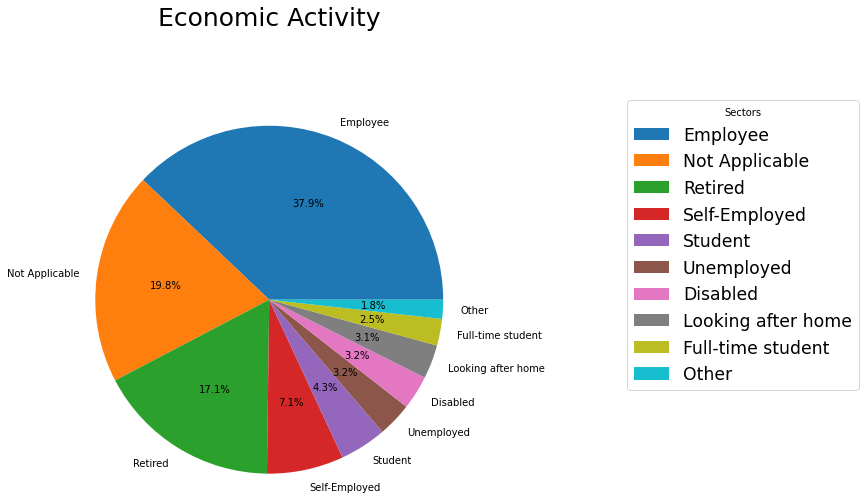

In [9]:
rg.get_pie_chart(df['Economic Activity'], vf['Economic Activity'], "Economic Activity", "Sectors", "economic_activity_pie.png")

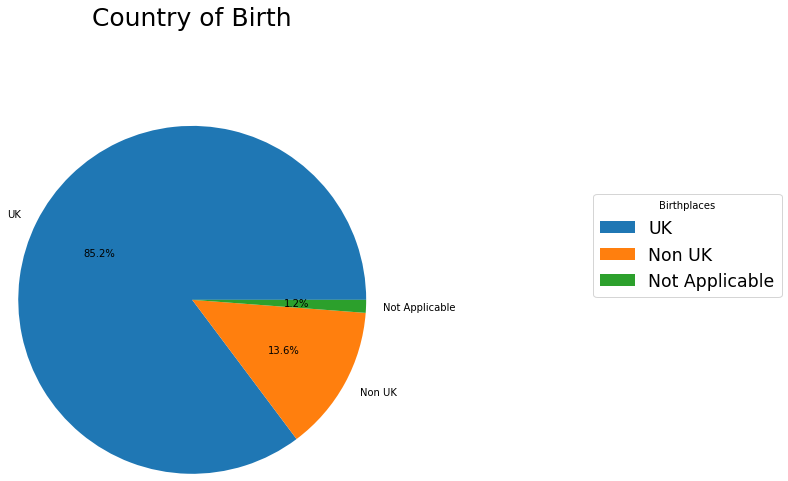

In [10]:
rg.get_pie_chart(df['Country of Birth'], vf['Country of Birth'], "Country of Birth", "Birthplaces", "cob_pie.png")

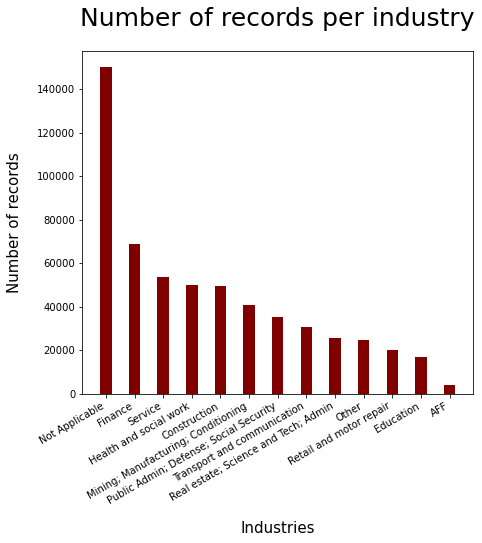

In [11]:
rg.get_bar_chart(df.Industry, vf.Industry, "Industries", "Number of records", "Number of records per industry", "industry_chart.png")

In [110]:
dt = df.groupby(['Region', 'Industry'], observed=True)['Region'].value_counts().unstack('Industry').fillna(0)
vrow = vf.Region.dropna()
vcolumn = vf.Industry
dt2 = pd.DataFrame()
i = 0
for c in dt.columns:
    dt2.insert(i, vcolumn[i], dt.get(c).tolist(), True)
    i += 1

dt2.set_index(vrow)

,Not Applicable,AFF,Mining; Manufacturing; Conditioning,Construction,Retail and motor repair,Service,Transport and communication,Finance,Real estate; Science and Tech; Admin,Public Admin; Defense; Social Security,Education,Health and social work,Other
Region,,,,,,,,,,,,,
North East,6854,132,2851,1574,3087,1300,1438,524,1883,1498,1836,2524,848
North West,18755,357,7726,3778,9016,3355,3981,1597,5822,3096,4890,6764,2299
Yorkshire and the Humber,14089,362,5956,3028,6670,2555,2788,1284,4046,2141,3961,4855,1736
East Midlands,11669,429,6057,2500,6133,1936,2518,844,3299,1751,3280,3952,1414
West Midlands,15768,396,7108,2960,7067,2281,3141,1149,4284,2061,3984,4848,1828
East of England,14748,616,5302,3508,7503,2336,3841,2199,5465,2514,4291,4977,2111
London,25517,55,3266,3700,8204,4054,6570,4016,9968,3015,5373,6109,3735
South East,22246,510,6651,4896,10548,3566,6502,3059,8708,4145,6593,7344,3316
South West,12401,697,5012,3033,6899,2712,2961,1510,4475,2973,4039,5085,1977


In [112]:
dt = df.groupby(['Occupation', 'Approximated Social Grade'], observed=True)['Occupation'].value_counts().unstack('Approximated Social Grade').fillna(0)
vrow = vf.Occupation.dropna()
vcolumn = vf['Approximated Social Grade']
dt2 = pd.DataFrame()
i = 0
for c in dt.columns:
    dt2.insert(i, vcolumn[i], dt.get(c).tolist(), True)
    i += 1

dt2.set_index(vrow)

,Not Applicable,AB,C1,C2,DE
Occupation,,,,,
Not Applicable,116915,1051,17787,2062,12169
Managers; Directors; Senior,492,19190,18555,584,967
Professional,884,48104,13223,891,1009
Associate Professional and Technical,819,7050,35435,647,986
Admin and secretarial,727,3000,44922,2353,2252
Skilled trades,678,585,2464,37190,7629
Service,478,1061,6343,15555,13860
Sales and customer service,1031,964,12184,2997,21347
PPM operatives,441,413,1719,11157,21088


In [210]:
dt = df.groupby(['Region', 'Economic Activity'], observed=True)['Region'].value_counts().unstack('Economic Activity').fillna(0)
vrow = vf.Region.dropna()
vcolumn = vf['Economic Activity']
dt2 = pd.DataFrame()
dt = dt.set_index(vrow)
i = 0
for c in dt.columns:
    dt2.insert(i, vcolumn[i], dt.get(c).tolist(), True)
    i += 1
    
dt2 = dt2.set_index(vrow)
dt3 = pd.DataFrame()
dt3.insert(0, "Economically active", dt2.drop(['Not Applicable', 'Retired', 'Student', 'Looking after home', 'Disabled', 'Other'], axis=1).sum(axis=1).tolist(), True)
dt3.insert(1, "Economically inactive", dt2.drop(['Employee', 'Self-Employed', 'Unemployed', 'Full-time student'], axis=1).sum(axis=1).tolist(), True)
dt3 = dt3.set_index(vrow)
dt3

,Economically active,Economically inactive
Region,,
North East,12897,13452
North West,35204,36232
Yorkshire and the Humber,26843,26628
East Midlands,23106,22676
West Midlands,27930,28945
East of England,30568,28843
London,44454,39128
South East,45551,42533
South West,27453,26321


In [212]:
dt = df.groupby(['Age', 'Economic Activity'], observed=True)['Age'].value_counts().unstack('Economic Activity').fillna(0)
vrow = vf.Age.dropna()
vcolumn = vf['Economic Activity']
dt2 = pd.DataFrame()
dt = dt.set_index(vrow)
i = 0
for c in dt.columns:
    dt2.insert(i, vcolumn[i], dt.get(c).tolist(), True)
    i += 1
    
dt2 = dt2.set_index(vrow)
dt3 = pd.DataFrame()
dt3.insert(0, "Economically active", dt2.drop(['Not Applicable', 'Retired', 'Student', 'Looking after home', 'Disabled', 'Other'], axis=1).sum(axis=1).tolist(), True)
dt3.insert(1, "Economically inactive", dt2.drop(['Employee', 'Self-Employed', 'Unemployed', 'Full-time student'], axis=1).sum(axis=1).tolist(), True)
dt3 = dt3.set_index(vrow)
dt3

,Economically active,Economically inactive
Age,,
0 to 15,0.0,106832.0
16 to 24,41663.0,31122.0
25 to 34,64326.0,11622.0
35 to 44,67050.0,11591.0
45 to 54,65736.0,11652.0
55 to 64,40584.0,25082.0
65 to 74,8022.0,40755.0
75 and over,1502.0,42202.0


In [254]:
dt = df.groupby(['Student', 'Economic Activity'], observed=True)['Student'].value_counts().unstack('Economic Activity').fillna(0)
vrow = vf.Student.dropna()
vcolumn = vf['Economic Activity']
dt2 = pd.DataFrame()
dt = dt.set_index(vrow)
i = 0
for c in dt.columns:
    dt2.insert(i, vcolumn[i], dt.get(c).tolist(), True)
    i += 1

dt2 = dt2.set_index(vrow)
yesCount = dt2.drop(['No'])[['Not Applicable','Full-time student', 'Student']].sum().sum()
actualYes = dt2.drop(['No']).sum().sum()
if (actualYes != yesCount):
    print(f"Discrepancy detected: {actualYes - yesCount} people claim to be a student but file themselves as being otherwise.")
noCount = dt2.drop(['Yes'])[['Full-time student', 'Student']].sum().sum()
if (noCount > 0):
    print(f"Discrepancy detected: {noCount} people claim to not be a student while filing their economic activity as being a student.")

Discrepancy detected: 918.0 people claim to not be a student while filing their economic activity as being a student.


In [284]:
dt = df.groupby(['Hours worked per week', 'Economic Activity'], observed=True)['Economic Activity'].value_counts().unstack('Economic Activity').fillna(0)
vrow = vf['Hours worked per week'].dropna()
vcolumn = vf['Economic Activity']
dt2 = pd.DataFrame()
dt = dt.set_index(vrow)
i = 0
for c in dt.columns:
    dt2.insert(i, vcolumn[i], dt.get(c).tolist(), True)
    i += 1

low = studentHours.loc['15 or less'].sum().sum()
med = studentHours.loc['16 to 30'].sum().sum()
high = studentHours.loc['31 to 48'].sum().sum()
very_high = studentHours.loc['49 or more'].sum().sum() 

dt2 = dt2.set_index(vrow)
studentHours = dt2[['Full-time student', 'Student']]
minHours = ((low * 1) + (med * 16) + (high * 31) + (very_high * 49))
maxHours = ((low * 15) + (med * 30) + (high * 48) + (very_high * 60))
print(f"The total number of hours worked by students is between {minHours} and {maxHours} hours, an average of {(minHours+maxHours)/2} hours.")

The total number of hours worked by students is between 109751.0 and 264639.0 hours, an average of 187195.0 hours.
